<a href="https://colab.research.google.com/github/samuelhenrick1/Arduino/blob/main/AN%C3%81LISE_ESTAT%C3%8DSTICA_T4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problema 1

Para uma amostra de oito operadores de máquina, foram coletados o número de horas de treinamento (x) e o tempo necessário para completar o trabalho (y). Os dados coletados encontram-se na tabela abaixo:

x = 5.2, 5.1, 4.9, 4.6, 4.7, 4.8, 4.6, 4.9

y = 13, 15, 16, 20, 19, 17, 21, 16

Com estes dados, faça:

a)    Um gráfico de dispersão para os dados



In [228]:
x <- c(5.2, 5.1, 4.9, 4.6, 4.7, 4.8, 4.6, 4.9)

y <- c(13, 15, 16, 20, 19, 17, 21, 16)

In [229]:
x
y

[1] 5.2 5.1 4.9 4.6 4.7 4.8 4.6 4.9

[1] 13 15 16 20 19 17 21 16

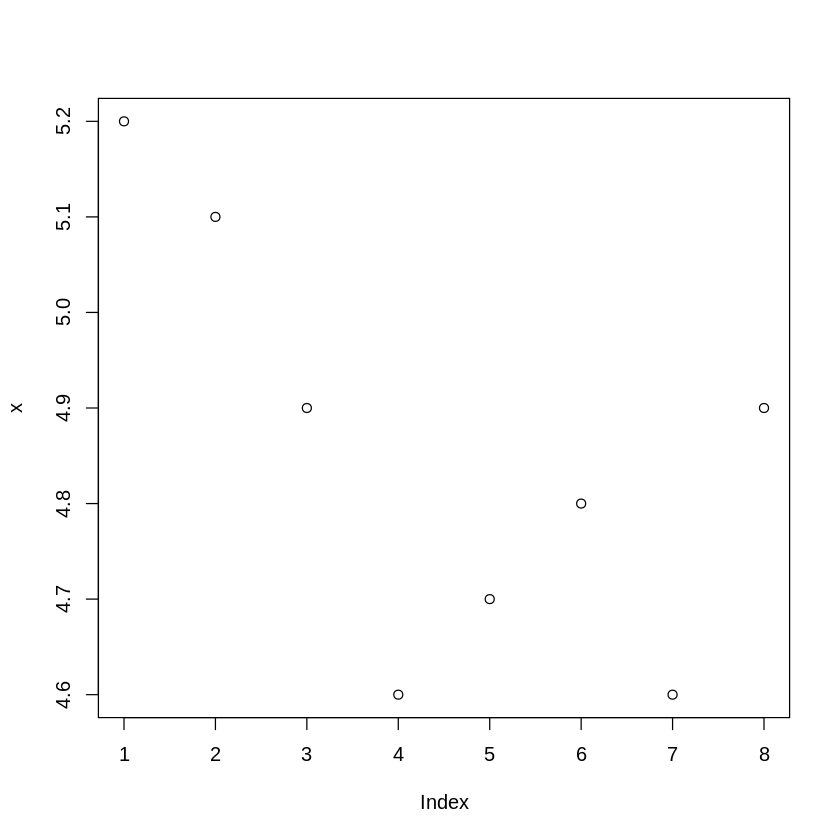

In [230]:
plot(x)

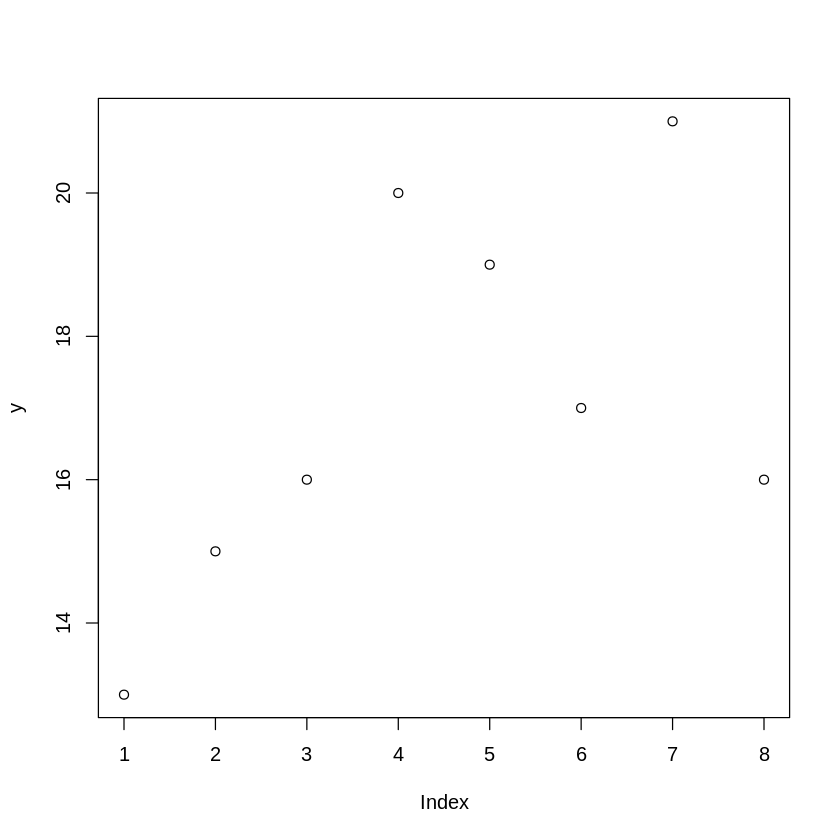

In [231]:
plot(y)

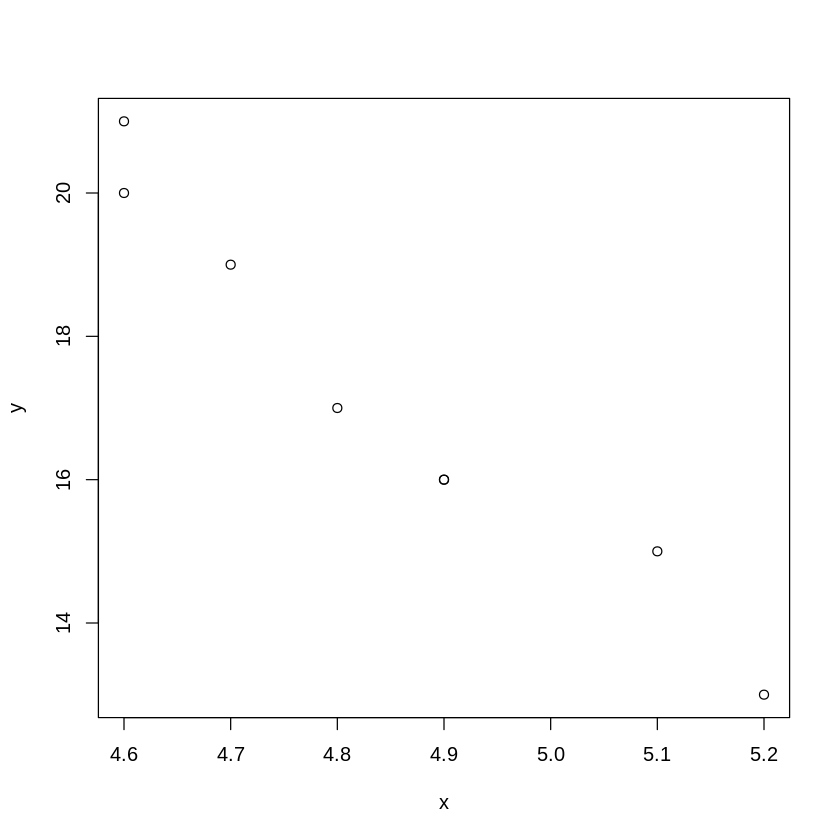

In [232]:
plot (x,y)

b)    Determine o modelo de regressão linear simples entre as variáveis x e y, sendo y a variável resposta

In [233]:
#Determinando a reta de regressão linear
lm(x~y)


Call:
lm(formula = x ~ y)

Coefficients:
(Intercept)            y  
    6.21327     -0.07961  


In [234]:
#Determinando o valor do coeficiente de determinação R2
SQt = sum((mean(y) - y)**2)
SQres = sum((predict(lm(y ~ x)) - y)**2)
R2 = (SQt - SQres) / SQt
R2

[1] 0.9482584

In [235]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



`geom_smooth()` using formula 'y ~ x'



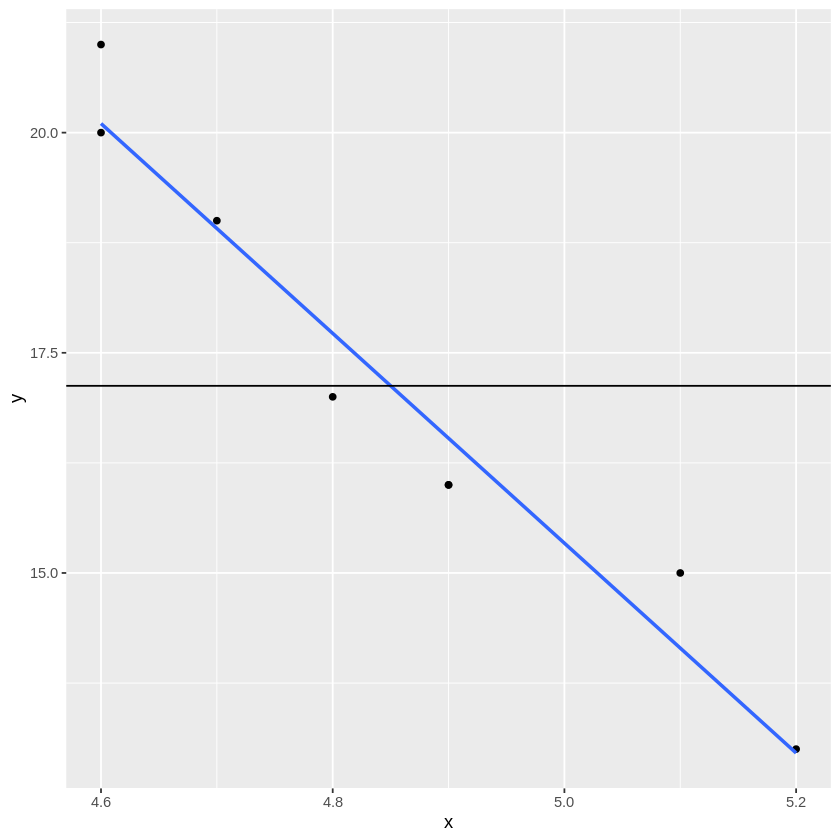

In [236]:
#Criando o gráfico com a regressão linear
retas <- ggplot(mapping = aes(x, y)) +
     geom_point() +
     geom_smooth(se = FALSE, method = "lm") + 
     geom_hline(yintercept = mean(y))
retas

c)    Faça uma análise do modelo de regressão utilizando a função summary:

* i)        resíduos, significância estatística dos coeficientes, percentual de variância explicada pelo modelo.

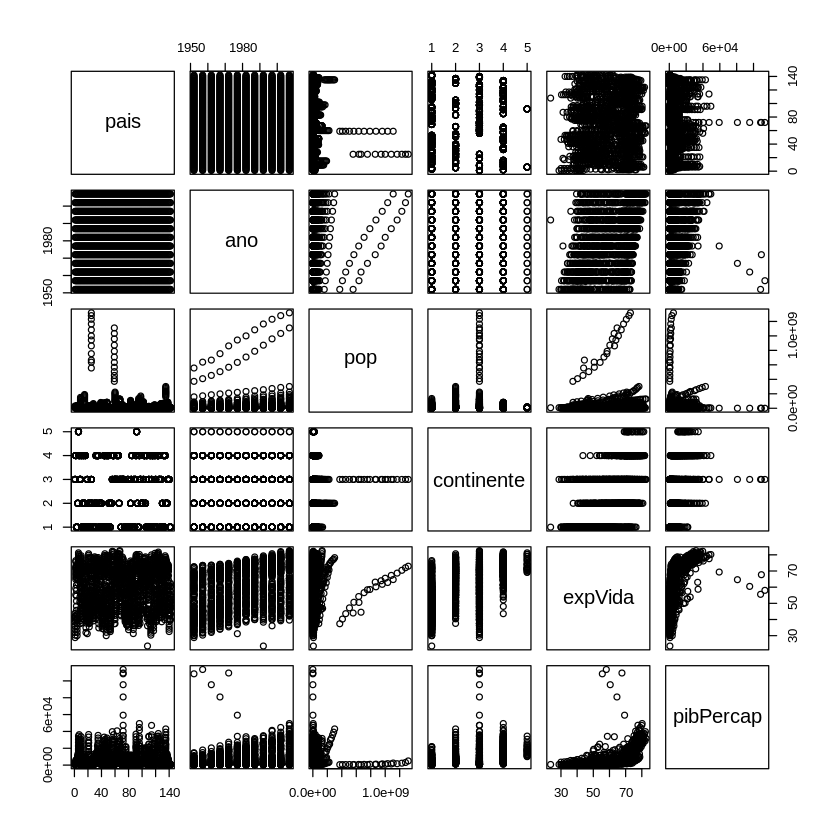

In [237]:
par(mfrow=c(2,2))
plot(pib)

In [238]:
print(summary(x))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.600   4.675   4.850   4.850   4.950   5.200 


In [239]:
print(summary(y))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.00   15.75   16.50   17.12   19.25   21.00 


d)    Trace, no gráfico anterior, a reta de regressão.


`geom_smooth()` using formula 'y ~ x'



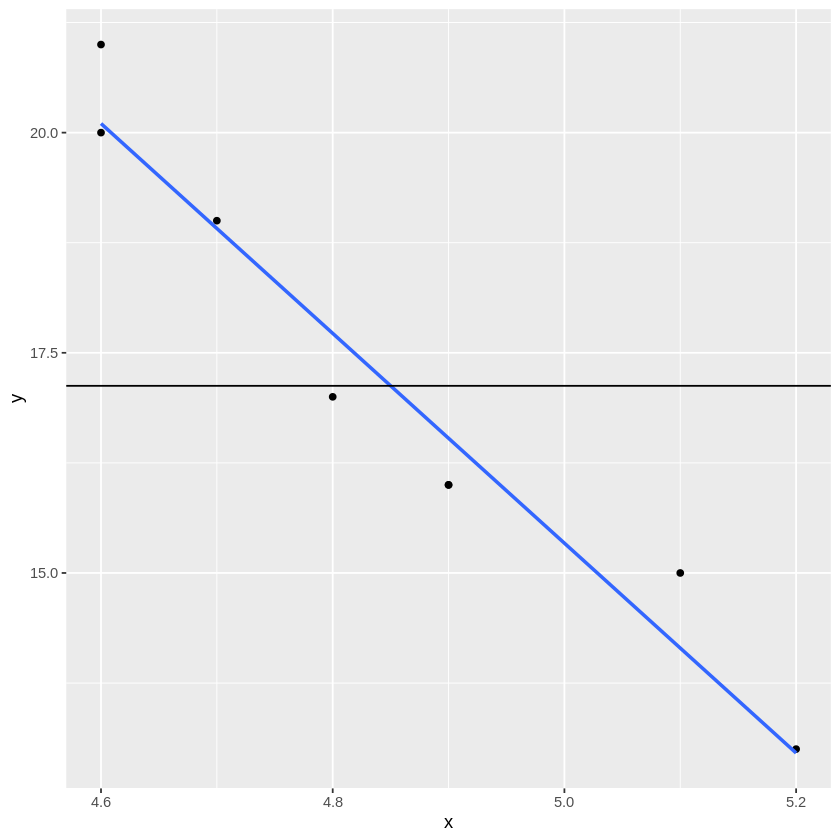

In [240]:
retas <- ggplot(mapping = aes(x, y)) +
     geom_point() +
     geom_smooth(se = FALSE, method = "lm") + 
     geom_hline(yintercept = mean(y))
retas

#Problema 2

O site Gapminder compilou uma base com dados sobre população, expectativa de vida e PIB per capta de 142 países, em 12 anos diferentes.

Com estes dados, disponibilizados no arquivo pib_gapminder.csv, faça:

a)    Faça a importação dos dados, verifique a estrutura e faça um sumário estatístico.

In [241]:
pib = read.csv('http://raw.githubusercontent.com/samuelhenrick1/Arduino/main/pib_gapminder.csv')

b)    Verifique a estrutura dos dados (str)



In [242]:
str(pib)

'data.frame':	1704 obs. of  6 variables:
 $ pais      : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ ano       : int  1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ pop       : num  8425333 9240934 10267083 11537966 13079460 ...
 $ continente: chr  "Asia" "Asia" "Asia" "Asia" ...
 $ expVida   : num  28.8 30.3 32 34 36.1 ...
 $ pibPercap : num  779 821 853 836 740 ...


c)    Classifique cada variável de acordo com seu tipo (qualitativa ordinal, nominal, quantitativa discreta, contínua, etc).

In [243]:
dicionario2 <- data.frame(
  id = 1:6,
      'Nome da Variável' = c('pais','ano','pop','continente','expVida','pibPercap'), 
          'Descrição' = c('Nome do País','Ano Apurado','População Vigente','Continente do País','Expectativa de Vida', 'Produto Interno Bruno Percapita'),
              'Tipo de Variável' = c('Numérica','Numérica','Numérica','Categórica','Numérica','Numérica'),
                  'Tipo de mensuração' = c('Nominal','Intervalar','Razão','Nominal','Razão','Razão'),
                      'Valores Possíveis' = c('Nomes dos Países do Planeta Terra', 'Números Ordenais Inteiros Positivos','Soma da quantidade de pessoas no País','Seleção dos 7 continentes existentes', 'Numeros Reais Positivos','Numeros Reais Positivos'),
    check.names = FALSE
)

In [244]:
dicionario2

id,Nome da Variável,Descrição,Tipo de Variável,Tipo de mensuração,Valores Possíveis
<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,pais,Nome do País,Numérica,Nominal,Nomes dos Países do Planeta Terra
2,ano,Ano Apurado,Numérica,Intervalar,Números Ordenais Inteiros Positivos
3,pop,População Vigente,Numérica,Razão,Soma da quantidade de pessoas no País
4,continente,Continente do País,Categórica,Nominal,Seleção dos 7 continentes existentes
5,expVida,Expectativa de Vida,Numérica,Razão,Numeros Reais Positivos
6,pibPercap,Produto Interno Bruno Percapita,Numérica,Razão,Numeros Reais Positivos


d)    Faça um sumário estatístico dos dados (Quartis; Percentis; Média; Mediana; Desvio Padrão; Variança; Moda)



- Ano

In [245]:
dic_ano = pib$ano
dic_ano

[1] 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957
  [15] 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967
  [29] 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967 1972 1977
  [43] 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967 1972 1977 1982 1987
  [57] 1992 1997 2002 2007 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997
  [71] 2002 2007 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007
  [85] 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957
  [99] 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967
 [113] 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967 1972 1977
 [127] 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967 1972 1977 1982 1987
 [141] 1992 1997 2002 2007 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997
 [155] 2002 2007 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007
 [169] 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957
 [183] 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967
 [197] 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967 1972 1977
 [211] 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967 1972 1977 1982 1987
 [225] 1992 1997 2002 2007 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997
 [239] 2002 2007 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007
 [253] 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957
 [267] 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967
 [281] 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967 1972 1977
 [295] 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967 1972 1977 1982 1987
 [309] 1992 1997 2002 2007 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997
 [323] 2002 2007 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007
 [337] 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957
 [351] 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967
 [365] 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967 1972 1977
 [379] 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967 1972 1977 1982 1987
 [393] 1992 1997 2002 2007 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997
 [407] 2002 2007 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007
 [421] 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957
 [435] 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967
 [449] 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967 1972 1977
 [463] 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967 1972 1977 1982 1987
 [477] 1992 1997 2002 2007 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997
 [491] 2002 2007 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007
 [505] 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957
 [519] 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967
 [533] 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967 1972 1977
 [547] 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967 1972 1977 1982 1987
 [561] 1992 1997 2002 2007 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997
 [575] 2002 2007 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007
 [589] 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957
 [603] 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967
 [617] 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967 1972 1977
 [631] 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967 1972 1977 1982 1987
 [645] 1992 1997 2002 2007 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997
 [659] 2002 2007 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007
 [673] 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957
 [687] 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967
 [701] 1972 1977 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967 1972 1977
 [715] 1982 1987 1992 1997 2002 2007 1952 1957 1962 1967 1972 1977 1982 1987

In [246]:
print("Sumário")
print(summary(dic_ano))#Quartis
print("Quantis")
print(quantile(dic_ano))
print("Média:") 
mean (dic_ano) #Média
print("Mediana:") 
median(dic_ano) #Mediana
print("Desvio Padrão:") 
sd(dic_ano) #Desvio Padrão
print("Variância") 
var(dic_ano) #Variância

[1] "Sumário"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1952    1966    1980    1980    1993    2007 
[1] "Quantis"
     0%     25%     50%     75%    100% 
1952.00 1965.75 1979.50 1993.25 2007.00 
[1] "Média:"


[1] 1979.5

[1] "Mediana:"


[1] 1979.5

[1] "Desvio Padrão:"


[1] 17.26533

[1] "Variância"


[1] 298.0916

In [247]:
# Create the function.
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

# Create the vector with numbers.
v <- dic_ano

# Calculate the mode using the user function.
result <- getmode(v)
print("Moda")
print(result)

[1] "Moda"
[1] 1952


- População

In [248]:
dic_populacao = pib$pop
dic_populacao

[1]    8425333    9240934   10267083   11537966   13079460   14880372
   [7]   12881816   13867957   16317921   22227415   25268405   31889923
  [13]    1282697    1476505    1728137    1984060    2263554    2509048
  [19]    2780097    3075321    3326498    3428038    3508512    3600523
  [25]    9279525   10270856   11000948   12760499   14760787   17152804
  [31]   20033753   23254956   26298373   29072015   31287142   33333216
  [37]    4232095    4561361    4826015    5247469    5894858    6162675
  [43]    7016384    7874230    8735988    9875024   10866106   12420476
  [49]   17876956   19610538   21283783   22934225   24779799   26983828
  [55]   29341374   31620918   33958947   36203463   38331121   40301927
  [61]    8691212    9712569   10794968   11872264   13177000   14074100
  [67]   15184200   16257249   17481977   18565243   19546792   20434176
  [73]    6927772    6965860    7129864    7376998    7544201    7568430
  [79]    7574613    7578903    7914969    8069876    8148312    8199783
  [85]     120447     138655     171863     202182     230800     297410
  [91]     377967     454612     529491     598561     656397     708573
  [97]   46886859   51365468   56839289   62821884   70759295   80428306
 [103]   93074406  103764241  113704579  123315288  135656790  150448339
 [109]    8730405    8989111    9218400    9556500    9709100    9821800
 [115]    9856303    9870200   10045622   10199787   10311970   10392226
 [121]    1738315    1925173    2151895    2427334    2761407    3168267
 [127]    3641603    4243788    4981671    6066080    7026113    8078314
 [133]    2883315    3211738    3593918    4040665    4565872    5079716
 [139]    5642224    6156369    6893451    7693188    8445134    9119152
 [145]    2791000    3076000    3349000    3585000    3819000    4086000
 [151]    4172693    4338977    4256013    3607000    4165416    4552198
 [157]     442308     474639     512764     553541     619351     781472
 [163]     970347    1151184    1342614    1536536    1630347    1639131
 [169]   56602560   65551171   76039390   88049823  100840058  114313951
 [175]  128962939  142938076  155975974  168546719  179914212  190010647
 [181]    7274900    7651254    8012946    8310226    8576200    8797022
 [187]    8892098    8971958    8658506    8066057    7661799    7322858
 [193]    4469979    4713416    4919632    5127935    5433886    5889574
 [199]    6634596    7586551    8878303   10352843   12251209   14326203
 [205]    2445618    2667518    2961915    3330989    3529983    3834415
 [211]    4580410    5126023    5809236    6121610    7021078    8390505
 [217]    4693836    5322536    6083619    6960067    7450606    6978607
 [223]    7272485    8371791   10150094   11782962   12926707   14131858
 [229]    5009067    5359923    5793633    6335506    7021028    7959865
 [235]    9250831   10780667   12467171   14195809   15929988   17696293
 [241]   14785584   17010154   18985849   20819767   22284500   23796400
 [247]   25201900   26549700   28523502   30305843   31902268   33390141
 [253]    1291695    1392284    1523478    1733638    1927260    2167533
 [259]    2476971    2840009    3265124    3696513    4048013    4369038
 [265]    2682462    2894855    3150417    3495967    3899068    4388260
 [271]    4875118    5498955    6429417    7562011    8835739   10238807
 [277]    6377619    7048426    7961258    8858908    9717524   10599793
 [283]   11487112   12463354   13572994   14599929   15497046   16284741
 [289]  556263528  637408000  665770000  754550000  862030000  943455000
 [295] 1000281000 1084035000 1164970000 1230075000 1280400000 1318683096
 [301]   12350771   14485993   17009885   19764027   22542890   25094412
 [307]   27764644   30964245   34202721   37657830   41008227   44227550
 [313]     153936     170928     191689     217378     250027     304739
 [319]     348643     395114     454429     527982     614382     710960
 [325]   14100005   15577932   17486434   19941073   23007669

In [249]:
print("Sumário")
print(summary(dic_populacao))#Quartis
print("Quantis")
print(quantile(dic_populacao))
print("Média:") 
mean (dic_populacao) #Média
print("Mediana:") 
median(dic_populacao) #Mediana
print("Desvio Padrão:") 
sd(dic_populacao) #Desvio Padrão
print("Variância") 
var(dic_populacao) #Variância

[1] "Sumário"
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
6.001e+04 2.794e+06 7.024e+06 2.960e+07 1.959e+07 1.319e+09 
[1] "Quantis"
        0%        25%        50%        75%       100% 
     60011    2793664    7023596   19585222 1318683096 
[1] "Média:"


[1] 29601212

[1] "Mediana:"


[1] 7023596

[1] "Desvio Padrão:"


[1] 106157897

[1] "Variância"


[1] 1.12695e+16

In [250]:
# Create the function.
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

# Create the vector with numbers.
v <- dic_populacao

# Calculate the mode using the user function.
result <- getmode(v)
print("Moda")
print(result)

[1] "Moda"
[1] 8425333


- Expectativa de Vida

In [251]:
dic_expecVida = pib$expVida
dic_expecVida

[1] 28.80100 30.33200 31.99700 34.02000 36.08800 38.43800 39.85400 40.82200
   [9] 41.67400 41.76300 42.12900 43.82800 55.23000 59.28000 64.82000 66.22000
  [17] 67.69000 68.93000 70.42000 72.00000 71.58100 72.95000 75.65100 76.42300
  [25] 43.07700 45.68500 48.30300 51.40700 54.51800 58.01400 61.36800 65.79900
  [33] 67.74400 69.15200 70.99400 72.30100 30.01500 31.99900 34.00000 35.98500
  [41] 37.92800 39.48300 39.94200 39.90600 40.64700 40.96300 41.00300 42.73100
  [49] 62.48500 64.39900 65.14200 65.63400 67.06500 68.48100 69.94200 70.77400
  [57] 71.86800 73.27500 74.34000 75.32000 69.12000 70.33000 70.93000 71.10000
  [65] 71.93000 73.49000 74.74000 76.32000 77.56000 78.83000 80.37000 81.23500
  [73] 66.80000 67.48000 69.54000 70.14000 70.63000 72.17000 73.18000 74.94000
  [81] 76.04000 77.51000 78.98000 79.82900 50.93900 53.83200 56.92300 59.92300
  [89] 63.30000 65.59300 69.05200 70.75000 72.60100 73.92500 74.79500 75.63500
  [97] 37.48400 39.34800 41.21600 43.45300 45.25200 46.92300 50.00900 52.81900
 [105] 56.01800 59.41200 62.01300 64.06200 68.00000 69.24000 70.25000 70.94000
 [113] 71.44000 72.80000 73.93000 75.35000 76.46000 77.53000 78.32000 79.44100
 [121] 38.22300 40.35800 42.61800 44.88500 47.01400 49.19000 50.90400 52.33700
 [129] 53.91900 54.77700 54.40600 56.72800 40.41400 41.89000 43.42800 45.03200
 [137] 46.71400 50.02300 53.85900 57.25100 59.95700 62.05000 63.88300 65.55400
 [145] 53.82000 58.45000 61.93000 64.79000 67.45000 69.86000 70.69000 71.14000
 [153] 72.17800 73.24400 74.09000 74.85200 47.62200 49.61800 51.52000 53.29800
 [161] 56.02400 59.31900 61.48400 63.62200 62.74500 52.55600 46.63400 50.72800
 [169] 50.91700 53.28500 55.66500 57.63200 59.50400 61.48900 63.33600 65.20500
 [177] 67.05700 69.38800 71.00600 72.39000 59.60000 66.61000 69.51000 70.42000
 [185] 70.90000 70.81000 71.08000 71.34000 71.19000 70.32000 72.14000 73.00500
 [193] 31.97500 34.90600 37.81400 40.69700 43.59100 46.13700 48.12200 49.55700
 [201] 50.26000 50.32400 50.65000 52.29500 39.03100 40.53300 42.04500 43.54800
 [209] 44.05700 45.91000 47.47100 48.21100 44.73600 45.32600 47.36000 49.58000
 [217] 39.41700 41.36600 43.41500 45.41500 40.31700 31.22000 50.95700 53.91400
 [225] 55.80300 56.53400 56.75200 59.72300 38.52300 40.42800 42.64300 44.79900
 [233] 47.04900 49.35500 52.96100 54.98500 54.31400 52.19900 49.85600 50.43000
 [241] 68.75000 69.96000 71.30000 72.13000 72.88000 74.21000 75.76000 76.86000
 [249] 77.95000 78.61000 79.77000 80.65300 35.46300 37.46400 39.47500 41.47800
 [257] 43.45700 46.77500 48.29500 50.48500 49.39600 46.06600 43.30800 44.74100
 [265] 38.09200 39.88100 41.71600 43.60100 45.56900 47.38300 49.51700 51.05100
 [273] 51.72400 51.57300 50.52500 50.65100 54.74500 56.07400 57.92400 60.52300
 [281] 63.44100 67.05200 70.56500 72.49200 74.12600 75.81600 77.86000 78.55300
 [289] 44.00000 50.54896 44.50136 58.38112 63.11888 63.96736 65.52500 67.27400
 [297] 68.69000 70.42600 72.02800 72.96100 50.64300 55.11800 57.86300 59.96300
 [305] 61.62300 63.83700 66.65300 67.76800 68.42100 70.31300 71.68200 72.88900
 [313] 40.71500 42.46000 44.46700 46.47200 48.94400 50.93900 52.93300 54.92600
 [321] 57.93900 60.66000 62.97400 65.15200 39.14300 40.65200 42.12200 44.05600
 [329] 45.98900 47.80400 47.78400 47.41200 45.54800 42.58700 44.96600 46.46200
 [337] 42.11100 45.05300 48.43500 52.04000 54.90700 55.62500 56.69500 57.47000
 [345] 56.43300 52.96200 52.97000 55.32200 57.20600 60.02600 62.84200 65.42400
 [353] 67.84900 70.75000 73.45000 74.75200 75.71300 77.26000 78.12300 78.78200
 [361] 40.47700 42.46900 44.93000 47.35000 49.80100 52.37400 53.98300 54.65500
 [369] 52.04400 47.99100 46.83200 48.32800 61.21000 64.77000 67.13000 68.50000
 [377] 69.61000 70.64000 70.46000 71.52000 72.52700 73.68000 74.87600 75.74800
 [385] 59.42100 62.32500 65.24600 68.29000 70.72300 72.64900 73.71700 74.17400
 [393] 74.41400 76.15100 77.15800 78.27300 66.87000 69.03000 69.90000 70.38000
 [401] 70.29000 70.71000 70.96000 71.58000 72.40000 7

In [252]:
print("Sumário")
print(summary(dic_expecVida))#Quartis
print("Quantis")
print(quantile(dic_expecVida))
print("Média:") 
mean (dic_expecVida) #Média
print("Mediana:") 
median(dic_expecVida) #Mediana
print("Desvio Padrão:") 
sd(dic_expecVida) #Desvio Padrão
print("Variância") 
var(dic_expecVida) #Variância

[1] "Sumário"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  23.60   48.20   60.71   59.47   70.85   82.60 
[1] "Quantis"
     0%     25%     50%     75%    100% 
23.5990 48.1980 60.7125 70.8455 82.6030 
[1] "Média:"


[1] 59.47444

[1] "Mediana:"


[1] 60.7125

[1] "Desvio Padrão:"


[1] 12.91711

[1] "Variância"


[1] 166.8517

In [253]:
# Create the function.
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

# Create the vector with numbers.
v <- dic_expecVida

# Calculate the mode using the user function.
result <- getmode(v)
print("Moda")
print(result)

[1] "Moda"
[1] 69.39


- PIB Percapto

In [254]:
dic_pib = pib$pibPercap
dic_pib

[1]    779.4453    820.8530    853.1007    836.1971    739.9811    786.1134
   [7]    978.0114    852.3959    649.3414    635.3414    726.7341    974.5803
  [13]   1601.0561   1942.2842   2312.8890   2760.1969   3313.4222   3533.0039
  [19]   3630.8807   3738.9327   2497.4379   3193.0546   4604.2117   5937.0295
  [25]   2449.0082   3013.9760   2550.8169   3246.9918   4182.6638   4910.4168
  [31]   5745.1602   5681.3585   5023.2166   4797.2951   5288.0404   6223.3675
  [37]   3520.6103   3827.9405   4269.2767   5522.7764   5473.2880   3008.6474
  [43]   2756.9537   2430.2083   2627.8457   2277.1409   2773.2873   4797.2313
  [49]   5911.3151   6856.8562   7133.1660   8052.9530   9443.0385  10079.0267
  [55]   8997.8974   9139.6714   9308.4187  10967.2820   8797.6407  12779.3796
  [61]  10039.5956  10949.6496  12217.2269  14526.1246  16788.6295  18334.1975
  [67]  19477.0093  21888.8890  23424.7668  26997.9366  30687.7547  34435.3674
  [73]   6137.0765   8842.5980  10750.7211  12834.6024  16661.6256  19749.4223
  [79]  21597.0836  23687.8261  27042.0187  29095.9207  32417.6077  36126.4927
  [85]   9867.0848  11635.7995  12753.2751  14804.6727  18268.6584  19340.1020
  [91]  19211.1473  18524.0241  19035.5792  20292.0168  23403.5593  29796.0483
  [97]    684.2442    661.6375    686.3416    721.1861    630.2336    659.8772
 [103]    676.9819    751.9794    837.8102    972.7700   1136.3904   1391.2538
 [109]   8343.1051   9714.9606  10991.2068  13149.0412  16672.1436  19117.9745
 [115]  20979.8459  22525.5631  25575.5707  27561.1966  30485.8838  33692.6051
 [121]   1062.7522    959.6011    949.4991   1035.8314   1085.7969   1029.1613
 [127]   1277.8976   1225.8560   1191.2077   1232.9753   1372.8779   1441.2849
 [133]   2677.3263   2127.6863   2180.9725   2586.8861   2980.3313   3548.0978
 [139]   3156.5105   2753.6915   2961.6997   3326.1432   3413.2627   3822.1371
 [145]    973.5332   1353.9892   1709.6837   2172.3524   2860.1698   3528.4813
 [151]   4126.6132   4314.1148   2546.7814   4766.3559   6018.9752   7446.2988
 [157]    851.2411    918.2325    983.6540   1214.7093   2263.6111   3214.8578
 [163]   4551.1421   6205.8839   7954.1116   8647.1423  11003.6051  12569.8518
 [169]   2108.9444   2487.3660   3336.5858   3429.8644   4985.7115   6660.1187
 [175]   7030.8359   7807.0958   6950.2830   7957.9808   8131.2128   9065.8008
 [181]   2444.2866   3008.6707   4254.3378   5577.0028   6597.4944   7612.2404
 [187]   8224.1916   8239.8548   6302.6234   5970.3888   7696.7777  10680.7928
 [193]    543.2552    617.1835    722.5120    794.8266    854.7360    743.3870
 [199]    807.1986    912.0631    931.7528    946.2950   1037.6452   1217.0330
 [205]    339.2965    379.5646    355.2032    412.9775    464.0995    556.1033
 [211]    559.6032    621.8188    631.6999    463.1151    446.4035    430.0707
 [217]    368.4693    434.0383    496.9136    523.4323    421.6240    524.9722
 [223]    624.4755    683.8956    682.3032    734.2852    896.2260   1713.7787
 [229]   1172.6677   1313.0481   1399.6074   1508.4531   1684.1465   1783.4329
 [235]   2367.9833   2602.6642   1793.1633   1694.3375   1934.0114   2042.0952
 [241]  11367.1611  12489.9501  13462.4855  16076.5880  18970.5709  22090.8831
 [247]  22898.7921  26626.5150  26342.8843  28954.9259  33328.9651  36319.2350
 [253]   1071.3107   1190.8443   1193.0688   1136.0566   1070.0133   1109.3743
 [259]    956.7530    844.8764    747.9055    740.5063    738.6906    706.0165
 [265]   1178.6659   1308.4956   1389.8176   1196.8106   1104.1040   1133.9850
 [271]    797.9081    952.3861   1058.0643   1004.9614   1156.1819   1704.0637
 [277]   3939.9788   4315.6227   4519.0943   5106.6543   5494.0244   4756.7638
 [283]   5095.6657   5547.0638   7596.1260  10118.0532  10778.7838  13171.6388
 [289]    400.4486    575.9870    487.6740    612.7057    676.9001    741.2375
 [295]    962.4214   1378.9040   1655.7842   2289.2341   3119.2809   4959.1149
 [301]   2144.1151   2323.8056   2492.3511   2678.729

In [255]:
print("Sumário")
print(summary(dic_pib))#Quartis
print("Quantis")
print(quantile(dic_pib))
print("Média:") 
mean (dic_pib) #Média
print("Mediana:") 
median(dic_pib) #Mediana
print("Desvio Padrão:") 
sd(dic_pib) #Desvio Padrão
print("Variância") 
var(dic_pib) #Variância

[1] "Sumário"
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   241.2   1202.1   3531.8   7215.3   9325.5 113523.1 
[1] "Quantis"
         0%         25%         50%         75%        100% 
   241.1659   1202.0603   3531.8470   9325.4623 113523.1329 
[1] "Média:"


[1] 7215.327

[1] "Mediana:"


[1] 3531.847

[1] "Desvio Padrão:"


[1] 9857.455

[1] "Variância"


[1] 97169410

In [256]:
# Create the function.
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

# Create the vector with numbers.
v <- dic_pib

# Calculate the mode using the user function.
result <- getmode(v)
print("Moda")
print(result)

[1] "Moda"
[1] 779.4453


e)    Faça uma tabela de frequência absoluta e uma tabela de frequência relativa para verificar o número de observações por continente.

In [257]:
#Tabela de Frequência Absoluta
table(pib$continente)


  Africa Americas     Asia   Europe  Oceania 
     624      300      396      360       24 

In [258]:
#Tabela de Frequência Relativa
Tab = table(pib$continente) #salva a tabela em Tab
Total = sum(Tab) #soma os valores da tabela
Tab/Total #frequência absoluta dividido pelo total é igual à frequência relativa


    Africa   Americas       Asia     Europe    Oceania 
0.36619718 0.17605634 0.23239437 0.21126761 0.01408451 

f)     Faça um gráfico de barras da tabela de frequência absoluta dos continentes.

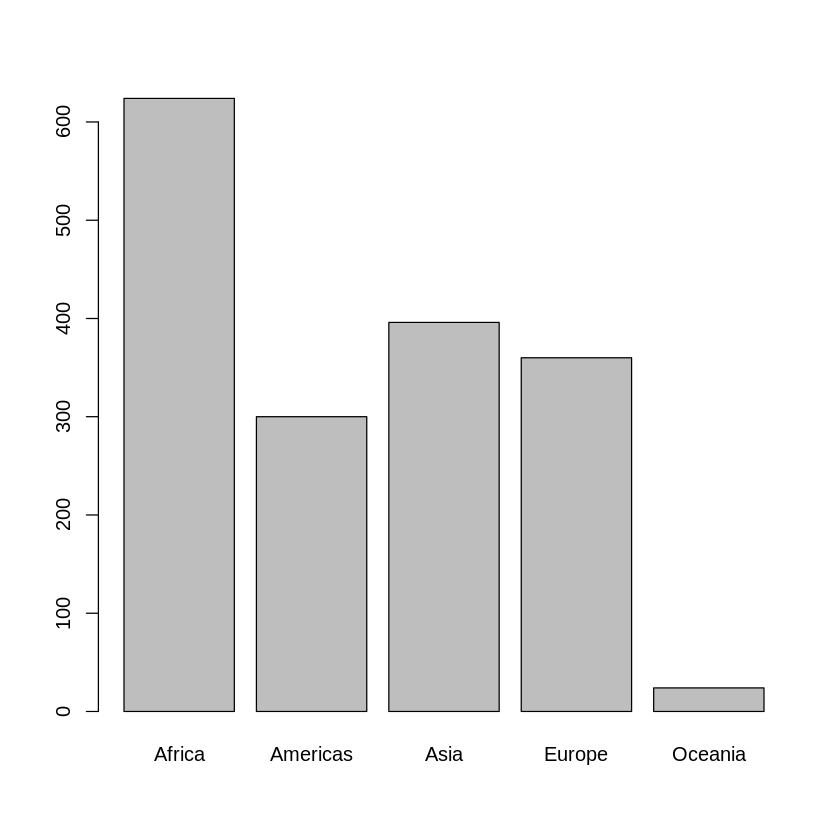

In [259]:
barplot(Tab)

g)    Faça um gráfico apropriado para relacionar o PIB per capta à expectativa de vida.

In [260]:
x_expVida = pib$expVida
y_pib = pib$pibPercap

In [261]:
x_expVida

[1] 28.80100 30.33200 31.99700 34.02000 36.08800 38.43800 39.85400 40.82200
   [9] 41.67400 41.76300 42.12900 43.82800 55.23000 59.28000 64.82000 66.22000
  [17] 67.69000 68.93000 70.42000 72.00000 71.58100 72.95000 75.65100 76.42300
  [25] 43.07700 45.68500 48.30300 51.40700 54.51800 58.01400 61.36800 65.79900
  [33] 67.74400 69.15200 70.99400 72.30100 30.01500 31.99900 34.00000 35.98500
  [41] 37.92800 39.48300 39.94200 39.90600 40.64700 40.96300 41.00300 42.73100
  [49] 62.48500 64.39900 65.14200 65.63400 67.06500 68.48100 69.94200 70.77400
  [57] 71.86800 73.27500 74.34000 75.32000 69.12000 70.33000 70.93000 71.10000
  [65] 71.93000 73.49000 74.74000 76.32000 77.56000 78.83000 80.37000 81.23500
  [73] 66.80000 67.48000 69.54000 70.14000 70.63000 72.17000 73.18000 74.94000
  [81] 76.04000 77.51000 78.98000 79.82900 50.93900 53.83200 56.92300 59.92300
  [89] 63.30000 65.59300 69.05200 70.75000 72.60100 73.92500 74.79500 75.63500
  [97] 37.48400 39.34800 41.21600 43.45300 45.25200 46.92300 50.00900 52.81900
 [105] 56.01800 59.41200 62.01300 64.06200 68.00000 69.24000 70.25000 70.94000
 [113] 71.44000 72.80000 73.93000 75.35000 76.46000 77.53000 78.32000 79.44100
 [121] 38.22300 40.35800 42.61800 44.88500 47.01400 49.19000 50.90400 52.33700
 [129] 53.91900 54.77700 54.40600 56.72800 40.41400 41.89000 43.42800 45.03200
 [137] 46.71400 50.02300 53.85900 57.25100 59.95700 62.05000 63.88300 65.55400
 [145] 53.82000 58.45000 61.93000 64.79000 67.45000 69.86000 70.69000 71.14000
 [153] 72.17800 73.24400 74.09000 74.85200 47.62200 49.61800 51.52000 53.29800
 [161] 56.02400 59.31900 61.48400 63.62200 62.74500 52.55600 46.63400 50.72800
 [169] 50.91700 53.28500 55.66500 57.63200 59.50400 61.48900 63.33600 65.20500
 [177] 67.05700 69.38800 71.00600 72.39000 59.60000 66.61000 69.51000 70.42000
 [185] 70.90000 70.81000 71.08000 71.34000 71.19000 70.32000 72.14000 73.00500
 [193] 31.97500 34.90600 37.81400 40.69700 43.59100 46.13700 48.12200 49.55700
 [201] 50.26000 50.32400 50.65000 52.29500 39.03100 40.53300 42.04500 43.54800
 [209] 44.05700 45.91000 47.47100 48.21100 44.73600 45.32600 47.36000 49.58000
 [217] 39.41700 41.36600 43.41500 45.41500 40.31700 31.22000 50.95700 53.91400
 [225] 55.80300 56.53400 56.75200 59.72300 38.52300 40.42800 42.64300 44.79900
 [233] 47.04900 49.35500 52.96100 54.98500 54.31400 52.19900 49.85600 50.43000
 [241] 68.75000 69.96000 71.30000 72.13000 72.88000 74.21000 75.76000 76.86000
 [249] 77.95000 78.61000 79.77000 80.65300 35.46300 37.46400 39.47500 41.47800
 [257] 43.45700 46.77500 48.29500 50.48500 49.39600 46.06600 43.30800 44.74100
 [265] 38.09200 39.88100 41.71600 43.60100 45.56900 47.38300 49.51700 51.05100
 [273] 51.72400 51.57300 50.52500 50.65100 54.74500 56.07400 57.92400 60.52300
 [281] 63.44100 67.05200 70.56500 72.49200 74.12600 75.81600 77.86000 78.55300
 [289] 44.00000 50.54896 44.50136 58.38112 63.11888 63.96736 65.52500 67.27400
 [297] 68.69000 70.42600 72.02800 72.96100 50.64300 55.11800 57.86300 59.96300
 [305] 61.62300 63.83700 66.65300 67.76800 68.42100 70.31300 71.68200 72.88900
 [313] 40.71500 42.46000 44.46700 46.47200 48.94400 50.93900 52.93300 54.92600
 [321] 57.93900 60.66000 62.97400 65.15200 39.14300 40.65200 42.12200 44.05600
 [329] 45.98900 47.80400 47.78400 47.41200 45.54800 42.58700 44.96600 46.46200
 [337] 42.11100 45.05300 48.43500 52.04000 54.90700 55.62500 56.69500 57.47000
 [345] 56.43300 52.96200 52.97000 55.32200 57.20600 60.02600 62.84200 65.42400
 [353] 67.84900 70.75000 73.45000 74.75200 75.71300 77.26000 78.12300 78.78200
 [361] 40.47700 42.46900 44.93000 47.35000 49.80100 52.37400 53.98300 54.65500
 [369] 52.04400 47.99100 46.83200 48.32800 61.21000 64.77000 67.13000 68.50000
 [377] 69.61000 70.64000 70.46000 71.52000 72.52700 73.68000 74.87600 75.74800
 [385] 59.42100 62.32500 65.24600 68.29000 70.72300 72.64900 73.71700 74.17400
 [393] 74.41400 76.15100 77.15800 78.27300 66.87000 69.03000 69.90000 70.38000
 [401] 70.29000 70.71000 70.96000 71.58000 72.40000 7

In [262]:
y_pib

[1]    779.4453    820.8530    853.1007    836.1971    739.9811    786.1134
   [7]    978.0114    852.3959    649.3414    635.3414    726.7341    974.5803
  [13]   1601.0561   1942.2842   2312.8890   2760.1969   3313.4222   3533.0039
  [19]   3630.8807   3738.9327   2497.4379   3193.0546   4604.2117   5937.0295
  [25]   2449.0082   3013.9760   2550.8169   3246.9918   4182.6638   4910.4168
  [31]   5745.1602   5681.3585   5023.2166   4797.2951   5288.0404   6223.3675
  [37]   3520.6103   3827.9405   4269.2767   5522.7764   5473.2880   3008.6474
  [43]   2756.9537   2430.2083   2627.8457   2277.1409   2773.2873   4797.2313
  [49]   5911.3151   6856.8562   7133.1660   8052.9530   9443.0385  10079.0267
  [55]   8997.8974   9139.6714   9308.4187  10967.2820   8797.6407  12779.3796
  [61]  10039.5956  10949.6496  12217.2269  14526.1246  16788.6295  18334.1975
  [67]  19477.0093  21888.8890  23424.7668  26997.9366  30687.7547  34435.3674
  [73]   6137.0765   8842.5980  10750.7211  12834.6024  16661.6256  19749.4223
  [79]  21597.0836  23687.8261  27042.0187  29095.9207  32417.6077  36126.4927
  [85]   9867.0848  11635.7995  12753.2751  14804.6727  18268.6584  19340.1020
  [91]  19211.1473  18524.0241  19035.5792  20292.0168  23403.5593  29796.0483
  [97]    684.2442    661.6375    686.3416    721.1861    630.2336    659.8772
 [103]    676.9819    751.9794    837.8102    972.7700   1136.3904   1391.2538
 [109]   8343.1051   9714.9606  10991.2068  13149.0412  16672.1436  19117.9745
 [115]  20979.8459  22525.5631  25575.5707  27561.1966  30485.8838  33692.6051
 [121]   1062.7522    959.6011    949.4991   1035.8314   1085.7969   1029.1613
 [127]   1277.8976   1225.8560   1191.2077   1232.9753   1372.8779   1441.2849
 [133]   2677.3263   2127.6863   2180.9725   2586.8861   2980.3313   3548.0978
 [139]   3156.5105   2753.6915   2961.6997   3326.1432   3413.2627   3822.1371
 [145]    973.5332   1353.9892   1709.6837   2172.3524   2860.1698   3528.4813
 [151]   4126.6132   4314.1148   2546.7814   4766.3559   6018.9752   7446.2988
 [157]    851.2411    918.2325    983.6540   1214.7093   2263.6111   3214.8578
 [163]   4551.1421   6205.8839   7954.1116   8647.1423  11003.6051  12569.8518
 [169]   2108.9444   2487.3660   3336.5858   3429.8644   4985.7115   6660.1187
 [175]   7030.8359   7807.0958   6950.2830   7957.9808   8131.2128   9065.8008
 [181]   2444.2866   3008.6707   4254.3378   5577.0028   6597.4944   7612.2404
 [187]   8224.1916   8239.8548   6302.6234   5970.3888   7696.7777  10680.7928
 [193]    543.2552    617.1835    722.5120    794.8266    854.7360    743.3870
 [199]    807.1986    912.0631    931.7528    946.2950   1037.6452   1217.0330
 [205]    339.2965    379.5646    355.2032    412.9775    464.0995    556.1033
 [211]    559.6032    621.8188    631.6999    463.1151    446.4035    430.0707
 [217]    368.4693    434.0383    496.9136    523.4323    421.6240    524.9722
 [223]    624.4755    683.8956    682.3032    734.2852    896.2260   1713.7787
 [229]   1172.6677   1313.0481   1399.6074   1508.4531   1684.1465   1783.4329
 [235]   2367.9833   2602.6642   1793.1633   1694.3375   1934.0114   2042.0952
 [241]  11367.1611  12489.9501  13462.4855  16076.5880  18970.5709  22090.8831
 [247]  22898.7921  26626.5150  26342.8843  28954.9259  33328.9651  36319.2350
 [253]   1071.3107   1190.8443   1193.0688   1136.0566   1070.0133   1109.3743
 [259]    956.7530    844.8764    747.9055    740.5063    738.6906    706.0165
 [265]   1178.6659   1308.4956   1389.8176   1196.8106   1104.1040   1133.9850
 [271]    797.9081    952.3861   1058.0643   1004.9614   1156.1819   1704.0637
 [277]   3939.9788   4315.6227   4519.0943   5106.6543   5494.0244   4756.7638
 [283]   5095.6657   5547.0638   7596.1260  10118.0532  10778.7838  13171.6388
 [289]    400.4486    575.9870    487.6740    612.7057    676.9001    741.2375
 [295]    962.4214   1378.9040   1655.7842   2289.2341   3119.2809   4959.1149
 [301]   2144.1151   2323.8056   2492.3511   2678.729

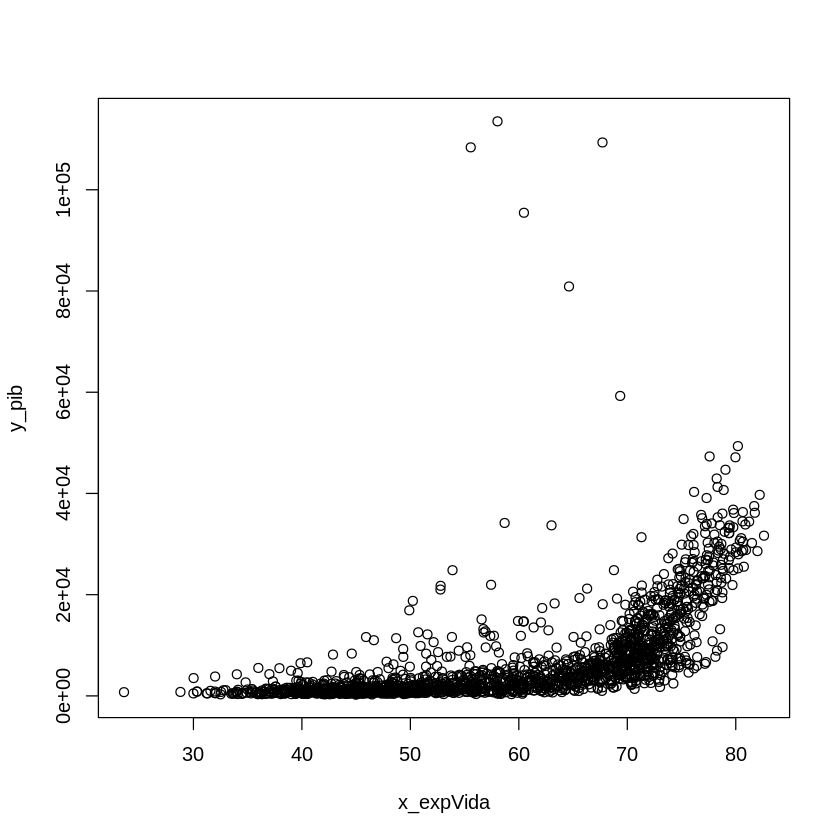

In [263]:
plot(x_expVida, y_pib)

h)    Crie duas novas colunas nesta base de dados com o logaritmo de PIB per capta, e o logaritmo da expectativa de vida. Estas colunas devem ter os nomes: lpibPercap e lexpVida, respectivamente.

In [264]:
dados = pib


In [265]:
dados["lpibPercap"] <- ((pib$pibPercap - 2) / 2.6) #Apliquei a função logaritma do PIB Per Capta
str(dados)


'data.frame':	1704 obs. of  7 variables:
 $ pais      : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ ano       : int  1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ pop       : num  8425333 9240934 10267083 11537966 13079460 ...
 $ continente: chr  "Asia" "Asia" "Asia" "Asia" ...
 $ expVida   : num  28.8 30.3 32 34 36.1 ...
 $ pibPercap : num  779 821 853 836 740 ...
 $ lpibPercap: num  299 315 327 321 284 ...


In [266]:
dados["lexpVida"] <- (pib$expVida / pib$pop) #Apliquei a função logaritma da Expecativa de Vida
str(dados)


'data.frame':	1704 obs. of  8 variables:
 $ pais      : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ ano       : int  1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ pop       : num  8425333 9240934 10267083 11537966 13079460 ...
 $ continente: chr  "Asia" "Asia" "Asia" "Asia" ...
 $ expVida   : num  28.8 30.3 32 34 36.1 ...
 $ pibPercap : num  779 821 853 836 740 ...
 $ lpibPercap: num  299 315 327 321 284 ...
 $ lexpVida  : num  3.42e-06 3.28e-06 3.12e-06 2.95e-06 2.76e-06 ...


i)      Faça um gráfico apropriado para relacionar estas duas novas variáveis.

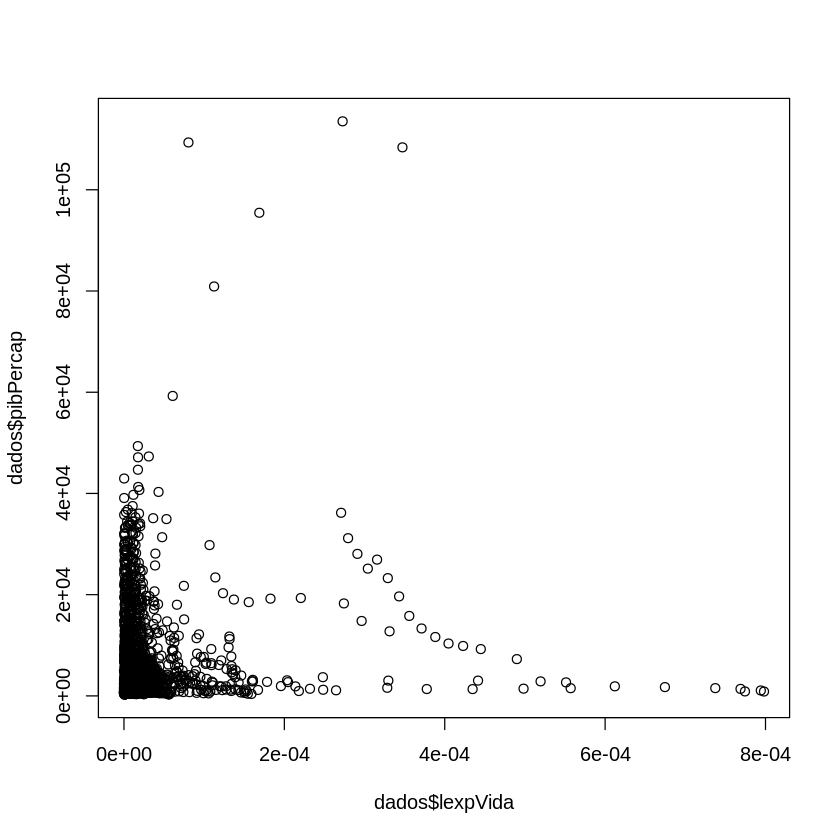

In [267]:
plot(dados$lexpVida, dados$pibPercap)

j)      Ajuste um modelo linear aos dados, utilizando as duas novas variáveis criadas, sendo lexpVida a variável resposta.

In [268]:
#Determinando a reta de regressão linear
lm(dados$lexpVida ~ dados$pibPercap )


Call:
lm(formula = dados$lexpVida ~ dados$pibPercap)

Coefficients:
    (Intercept)  dados$pibPercap  
      2.545e-05        4.217e-10  


In [269]:
#Determinando o valor do coeficiente de determinação R2
SQt = sum((mean(dados$pibPercap) - dados$pibPercap)**2)
SQres = sum((predict(lm(dados$pibPercap ~ dados$lexpVida)) - dados$pibPercap)**2)
R2 = (SQt - SQres) / SQt
R2

[1] 0.003255204

`geom_smooth()` using formula 'y ~ x'



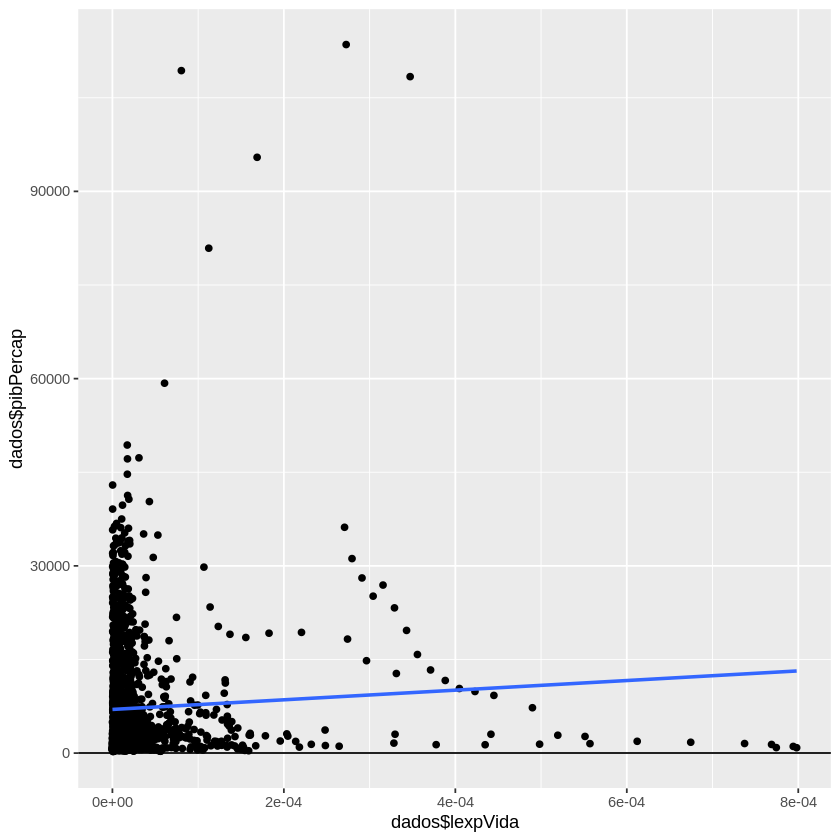

In [270]:
#Criando o gráfico com a regressão linear
retas2 <- ggplot(mapping = aes(dados$lexpVida, dados$pibPercap)) +
     geom_point() +
     geom_smooth(se = FALSE, method = "lm") + 
     geom_hline(yintercept = mean(y))
retas2

k)    Faça todas as análises da regressão, julgando:


*   i)        Os gráficos diagnósticos
*   ii)        Os parâmetros obtidos (avaliar o summary do modelo)
*   iii)        O poder de explicação do modelo.

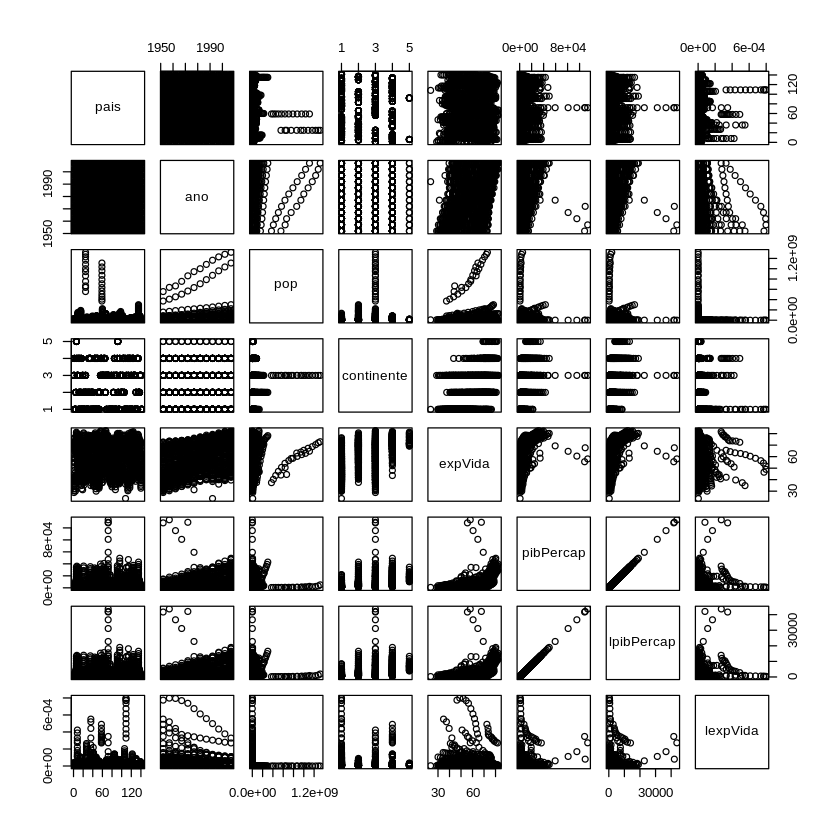

In [271]:
par(mfrow=c(2,2))
plot(dados)

In [272]:
print(summary(dados$lexpVida))

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
5.530e-08 3.112e-06 7.975e-06 2.849e-05 2.201e-05 7.981e-04 


In [273]:
print(summary(dados$pibPercap))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   241.2   1202.1   3531.8   7215.3   9325.5 113523.1 


#Problema 3

Neste exercício vamos fazer uma análise de regressão com a base de dados autos.csv para tentar prever o preço de carro a partir de sua potência. Na nossa base de dados, estas variáveis são horsepower e price.

Utilizando então a base disponibilizada, você deve:

a)    Criar um dicionário de dados, para entender o significado o tipo de cada variável; veja no link fornecido se há documentação disponível. 

http://archive.ics.uci.edu/ml/datasets/Automobile

In [274]:
autos = read.csv2('https://raw.githubusercontent.com/samuelhenrick1/Arduino/main/autos.csv')

In [275]:
autos

make,fuel.type,aspiration,num.doors,body.style,drive.wheels,engine.location,wheel.base,length,width,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,⋯,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,⋯,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,⋯,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
audi,gas,std,2,sedan,fwd,front,99.8,177.3,66.3,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
audi,gas,std,4,wagon,fwd,front,105.8,192.7,71.4,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
audi,gas,turbo,4,sedan,fwd,front,105.8,192.7,71.4,⋯,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875


In [276]:
dicionario3 <- data.frame(
  id = 1:24,
  'Nome da Variável' = c('make','fuel.type','aspiration','num.doors','body.style','drive.wheels','engine.location','wheel.base','length','width','height','curb.weight','engine.type','num.cylinders','engine.size','fuel.system','bore','stroke','compression.ratio','horsepower','peak.rpm','city.mpg','highway.mpg','price'),
  'Descrição' = c('Marca','Tipo de Combustível','Aspiração','Número de Portas','Estilo de Corpo','Rodas Motrizes','Localização do Motor','Base da Roda','Comprimento','Largura','Altura','Peso de Freio','Tipo de Motor','Número de Cilindros','Tamanho do Motor','Sistema de Combustível','Furo','Derramete','Taxa de Compressão','Cavalo-Vapor','Pico de RPM','Cidade RPM','Rodovia','Preço'),
  'Tipo de Variável' = c('Categória','Categórica','Categórica','Numérica','Categórica','Categórica','Categórica','Numérica','Numérica','Numérica','Numérica','Numérica','Categórica','Numérica','Numérica','Categórica','Numérica','Numérica','Numérica','Numérica','Numérica','Numérica','Numérica','Numérica'),
  'Tipo de mensuração' = c('Nominal','Nominal','Nominal','Razão','Nominal','Nominal','Nominal','Razão','Razão','Razão','Razão','Razão','Nominal','Razão','Razão','Nominal','Razão','Razão','Razão','Razão','Razão','Razão','Razão','Razão'),
  'Valores Possíveis' = c('Fabricantes de Carros', 'Gas/Diesel','STD/Turbo','2/4 Portas', 'Estilo do Corpo de Carro','Posição das Rodas Motrizes', 'Frontal/Traseiro', 'Número Real Positivo', 'Número Real Positivo', 'Número Real Positivo', 'Número Inteiro Positivo','Tipo de Motor', 'Número Inteiro Positivo', 'Número Inteiro Positivo','Tipo do Sistema de Combustível','Número Real Positivo', 'Número Real Positivo','Número Real Positivo','Número Inteiro Positivo','Número Inteiro Positivo','Numero Inteiro Positivo','Numéro Inteiro Positivo', 'Número Real Positivo','Número Real Positivo'),
  check.names = FALSE
)

In [277]:
dicionario3

id,Nome da Variável,Descrição,Tipo de Variável,Tipo de mensuração,Valores Possíveis
<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,make,Marca,Categória,Nominal,Fabricantes de Carros
2,fuel.type,Tipo de Combustível,Categórica,Nominal,Gas/Diesel
3,aspiration,Aspiração,Categórica,Nominal,STD/Turbo
4,num.doors,Número de Portas,Numérica,Razão,2/4 Portas
5,body.style,Estilo de Corpo,Categórica,Nominal,Estilo do Corpo de Carro
6,drive.wheels,Rodas Motrizes,Categórica,Nominal,Posição das Rodas Motrizes
7,engine.location,Localização do Motor,Categórica,Nominal,Frontal/Traseiro
8,wheel.base,Base da Roda,Numérica,Razão,Número Real Positivo
9,length,Comprimento,Numérica,Razão,Número Real Positivo


b)    Carregar a base para o R, certificando-se de que os dados estão corretos, de acordo com o dicionário de dados.

In [278]:
str(autos)

'data.frame':	193 obs. of  24 variables:
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.doors        : int  2 2 2 4 4 2 4 4 4 2 ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 64.8 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 54.3 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 2395 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.cylinders    : int  4 4 6 4 5 5 5 5 5 4 ...
 $ engine.size      : int  130 130 152 109 136 136 136 136 131

c)    Explore a base de dados:

* i)        Sumários estatísticos dos dados
* ii)        Tabelas quando apropriado
* iii)        Gráficos exploratórios apropriados.

In [279]:
summary(autos)

     make            fuel.type          aspiration          num.doors    
 Length:193         Length:193         Length:193         Min.   :2.000  
 Class :character   Class :character   Class :character   1st Qu.:2.000  
 Mode  :character   Mode  :character   Mode  :character   Median :4.000  
                                                          Mean   :3.161  
                                                          3rd Qu.:4.000  
                                                          Max.   :4.000  
  body.style        drive.wheels       engine.location      wheel.base    
 Length:193         Length:193         Length:193         Min.   : 86.60  
 Class :character   Class :character   Class :character   1st Qu.: 94.50  
 Mode  :character   Mode  :character   Mode  :character   Median : 97.00  
                                                          Mean   : 98.92  
                                                          3rd Qu.:102.40  
                                

In [280]:
table(autos$num.doors)


  2   4 
 81 112 

In [281]:
table(autos$wheel.base)


 86.6  88.4  88.6  89.5  91.3    93  93.1  93.3  93.7  94.3  94.5  95.1  95.7 
    2     1     2     3     2     1     5     1    19     1    19     1    13 
 95.9    96  96.3  96.5  96.6  96.9    97  97.2  97.3  98.4  98.8  99.1  99.2 
    5     1     6     8     1     2     4     5     7     6     5     6     1 
 99.4  99.8 100.4 101.2   102 102.4 102.7 102.9 103.3 103.5 104.3 104.5 104.9 
    1     2     6     4     1     5     1     2     2     3     6     2     2 
105.8 106.7 107.9   108 109.1   110   112   113 114.2 115.6 120.9 
    3     1     6     1     5     3     1     2     4     2     1 

In [282]:
table(autos$length)


141.1 144.6   150 155.9 156.9 157.1 157.3 157.9 158.7 158.8 159.1 159.3 162.4 
    1     2     3     1     1     1    14     1     3     1     3     1     1 
163.4 165.3 165.6 165.7 166.3 166.8 167.3 167.5 168.7 168.8 168.9 169.1 169.7 
    1     6     1     1     7     2     2     2     4     2     4     1     3 
170.2 170.7 171.2 171.7   172 172.4 172.6   173 173.2 173.4 173.5 173.6 174.6 
    2     3     1     7     5     4     1     2     5     2     2     2     2 
  175 175.4 175.6 176.2 176.6 176.8 177.3 177.8 178.4 178.5 180.2 180.3 181.7 
    2     3     5     6     2     4     1     5     1     1     2     1     1 
183.1 183.5 184.6 186.6 186.7 187.5 187.8 188.8   189 190.9 191.7 192.7 193.8 
    1     2     2     6     7     1     2    11     2     2     1     3     1 
  197 198.9 199.2 199.6 202.6 208.1 
    1     4     1     2     2     1 

In [283]:
table(autos$width) 


60.3 61.8 62.5 63.4 63.6 63.8 63.9   64 64.1 64.2 64.4 64.6 64.8   65 65.2 65.4 
   1    1    1    1    9   23    3    9    2    6   10    2    4    3    7   15 
65.5 65.6   66 66.1 66.2 66.3 66.4 66.5 66.9 67.2 67.7 67.9   68 68.3 68.4 68.8 
   8    6    1    2    1    6    1   21    5    6    2    4    1    2   10    1 
68.9 69.6 70.3 70.5 70.6 70.9 71.4 71.7   72 
   4    2    3    1    1    1    3    3    1 

In [284]:
table(autos$height)


47.8 48.8 49.4 49.7 50.2 50.6 50.8   51 51.4 51.6   52 52.4 52.5 52.6 52.8   53 
   1    2    2    3    6    4   14    1    2    7    9    1    3    7    6    6 
53.1 53.2 53.3 53.5 53.7 53.9 54.1 54.3 54.4 54.5 54.7 54.8 54.9 55.1 55.4 55.5 
   1    1    4    3    5    2   10    8    2   10    2    1    6    5    1    8 
55.6 55.7 55.9   56 56.1 56.2 56.3 56.5 56.7 57.5 58.3 58.7 59.1 59.8 
   1   12    1    1    7    3    2    2    8    3    1    4    3    2 

In [285]:
table(autos$curb.weight)


1488 1713 1819 1837 1874 1876 1889 1890 1900 1905 1909 1918 1938 1940 1944 1945 
   1    1    1    1    1    2    1    1    1    1    1    3    1    1    1    1 
1950 1951 1956 1967 1971 1985 1989 2004 2008 2010 2015 2017 2024 2028 2037 2040 
   1    1    1    2    1    1    3    1    1    1    1    1    2    1    1    1 
2050 2081 2094 2109 2120 2122 2128 2140 2145 2169 2190 2191 2204 2209 2212 2221 
   1    1    1    1    1    1    2    1    2    1    1    1    1    1    1    1 
2236 2240 2254 2261 2264 2265 2275 2280 2289 2290 2293 2300 2302 2304 2319 2324 
   1    1    1    1    1    1    3    1    1    2    1    2    1    1    1    1 
2326 2328 2337 2340 2365 2370 2372 2385 2395 2403 2405 2410 2414 2420 2425 2455 
   1    1    2    1    1    1    1    3    2    2    1    2    2    1    1    1 
2458 2465 2480 2507 2510 2535 2536 2540 2548 2551 2563 2579 2650 2658 2661 2670 
   1    1    1    1    1    2    1    1    2    1    1    1    1    1    1    1 
2679 2695 2700 2707 2710 27

In [286]:
table(autos$num.cylinders)


  3   4   5   6   8  12 
  1 153  10  24   4   1 

In [287]:
table(autos$engine.size)


 61  79  90  91  92  97  98 103 108 109 110 111 119 120 121 122 130 131 134 136 
  1   1  10   5  15  14  13   1  13   8  12   1   1   7   6  14   4   1   2   5 
140 141 145 146 151 152 156 161 164 171 173 181 183 194 209 234 258 304 308 326 
  2   7   1   6   1   6   5   1   3   3   1   6   4   3   3   2   2   1   1   1 

In [288]:
table(autos$bore)


2.54 2.68 2.91 2.92 2.97 2.99 3.01 3.03 3.05 3.08 3.13 3.15 3.17 3.19 3.24 3.27 
   1    1    7    1   12    1    5    9    6    1    1   15    3   20    2    7 
3.31 3.33 3.34 3.35 3.39 3.43 3.46 3.47  3.5 3.54 3.58 3.59  3.6 3.61 3.62 3.63 
   8    2    1    4    5    8    7    2    2    6    6    3    1    1   23    2 
 3.7 3.74 3.76 3.78  3.8 3.94 
   5    3    1    8    2    1 

In [289]:
table(autos$stroke)


2.07 2.19 2.36 2.64 2.68 2.76  2.8 2.87  2.9 3.03 3.07 3.08  3.1 3.11 3.12 3.15 
   1    2    1   11    2    1    2    1    3   14    6    2    2    3    1   14 
3.16 3.19 3.21 3.23 3.27 3.29 3.35 3.39  3.4 3.41 3.46 3.47  3.5 3.52 3.54 3.58 
   1    6    1   14    6    9    9   11   19    6    8    4    6    5    4    6 
3.64 3.86  3.9 4.17 
   5    4    1    2 

In [290]:
table(autos$compression.ratio)


   7  7.5  7.6  7.7  7.8    8  8.1  8.3  8.4  8.5  8.6  8.7  8.8    9  9.1  9.2 
   6    5    3    2    1    8    2    3    5   14    5    7    3   46    1    8 
 9.3 9.31  9.4 9.41  9.5  9.6   10 10.1 11.5   21 21.5 21.9   22 22.5   23 
  11    1   22    1   13    3    2    1    1    5    4    1    1    3    5 

In [291]:
table(autos$horsepower)


 48  52  55  56  58  60  62  68  69  70  72  73  76  78  82  84  85  86  88  90 
  1   2   1   2   1   1   6  19  10   9   1   3   5   1   5   5   3   4   6   3 
 92  94  95  97 100 101 102 106 110 111 112 114 115 116 120 121 123 134 140 142 
  4   2   7   5   2   3   4   1   8   4   2   6   1   9   1   3   4   1   1   1 
143 145 152 154 155 156 160 161 162 175 176 182 184 200 207 262 
  1   5   3   1   2   2   5   2   2   1   2   3   2   1   3   1 

In [292]:
table(autos$peak.rpm)


4150 4200 4250 4350 4400 4500 4750 4800 4900 5000 5100 5200 5250 5300 5400 5500 
   5    5    3    4    3    7    4   36    1   27    3   23    7    1   11   35 
5600 5800 5900 6000 6600 
   1    7    3    5    2 

In [293]:
table(autos$city.mpg)


13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 37 38 45 
 1  2  3  4  9  3 27  3  8  4 10 21  8 12 14  7  3  8 28  1  1  1  1  6  5  1 
47 49 
 1  1 

In [294]:
table(autos$highway.mpg)


16 17 18 19 20 22 23 24 25 26 27 28 29 30 31 32 33 34 36 37 38 39 41 42 43 46 
 2  1  2  2  2  7  3 17 19  3  5 12 10 15  6 16  9 14  2 13 17  2  3  2  2  2 
47 50 53 54 
 2  1  1  1 

In [295]:
table(autos$price) 


 5118  5151  5195  5348  5389  5399  5499  5572  6095  6189  6229  6295  6338 
    1     1     1     1     1     1     1     2     1     1     2     1     1 
 6377  6479  6488  6529  6575  6649  6669  6692  6695  6785  6795  6849  6855 
    1     1     1     1     1     1     1     2     1     1     1     1     1 
 6918  6938  6989  7053  7099  7126  7129  7198  7295  7299  7349  7395  7463 
    1     1     1     1     1     1     1     1     2     1     1     1     1 
 7499  7603  7609  7689  7738  7775  7788  7799  7895  7898  7957  7975  7995 
    1     1     2     1     1     2     1     1     1     2     2     1     1 
 7999  8013  8058  8189  8195  8238  8249  8358  8449  8495  8499  8778  8845 
    1     1     1     1     1     1     1     1     1     2     1     1     2 
 8921  8948  8949  9095  9233  9258  9279  9298  9495  9538  9549  9639  9959 
    2     1     1     1     1     1     2     1     1     1     1     1     1 
 9960  9980  9988  9989  9995 10198 10245 10295 103

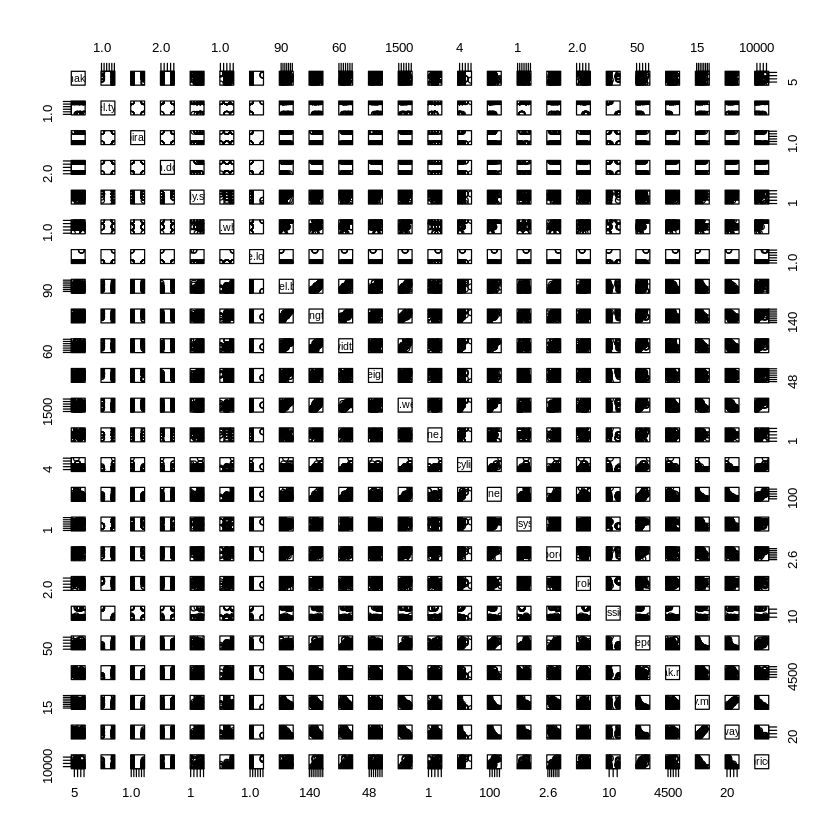

In [296]:
par(mfrow=c(1,1))
plot(autos)

d)    Considerando então apenas uma variável preditora (explicativa) no modelo (horsepower), tente ajustar um modelo para explicar o preço (price) dos darros

In [297]:
y_preco = autos$price
x_horse = autos$horsepower

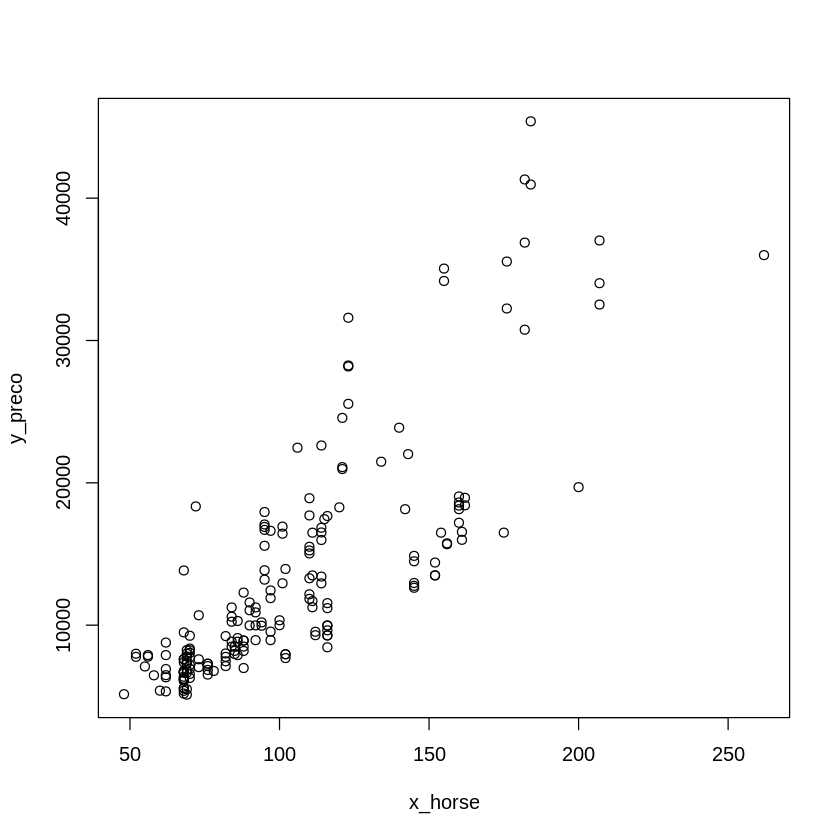

In [298]:
plot(x_horse,y_preco)

In [299]:
#Determinando a reta de regressão linear
lm(x_horse~y_preco)


Call:
lm(formula = x_horse ~ y_preco)

Coefficients:
(Intercept)      y_preco  
  52.830763     0.003813  


In [300]:
#Determinando o valor do coeficiente de determinação R2
SQt = sum((mean(y_preco) - y_preco)**2)
SQres = sum((predict(lm(y_preco ~ x_horse)) - y_preco)**2)
R2 = (SQt - SQres) / SQt
R2

[1] 0.6600802

`geom_smooth()` using formula 'y ~ x'



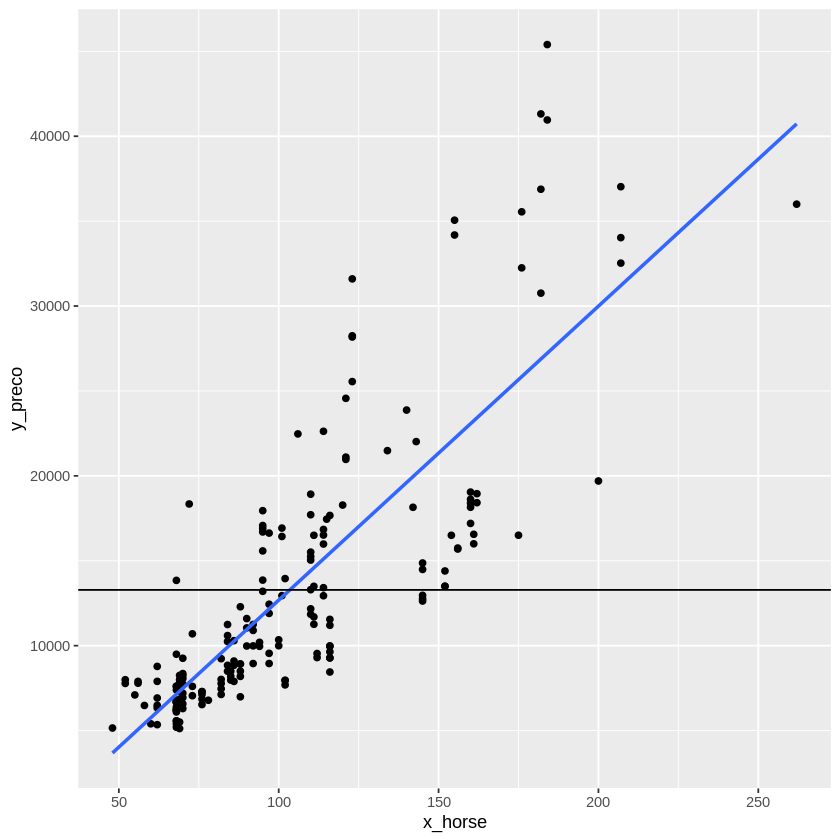

In [301]:
#Criando o gráfico com a regressão linear
retas3 <- ggplot(mapping = aes(x_horse, y_preco)) +
     geom_point() +
     geom_smooth(se = FALSE, method = "lm") + 
     geom_hline(yintercept = mean(y_preco))
retas3

 i)        Qual sua intuição sobre o relacionamento da “potência” de um carro com o seu preço?

In [302]:
print("Quanto maior a potência, maior é o preço")

[1] "Quanto maior a potência, maior é o preço"


e)    Faça todas as análises da regressão (modelo), julgando:
* i)        Os gráficos diagnósticos
* ii)        Os parâmetros obtidos (avaliar o summary do modelo)

In [303]:
y_preco = autos$price
x_modelo = autos$make

In [304]:
#Tabela de Frequência Absoluta
table(autos$make)


  alfa-romero          audi           bmw     chevrolet         dodge 
            3             6             8             3             8 
        honda         isuzu        jaguar         mazda mercedes-benz 
           13             2             3            12             8 
      mercury    mitsubishi        nissan        peugot      plymouth 
            1            13            18            11             7 
      porsche          saab        subaru        toyota    volkswagen 
            4             6            12            32            12 
        volvo 
           11 

In [305]:
#Tabela de Frequência Relativa
Tab3 = table(autos$make) #salva a tabela em Tab
Total = sum(Tab3) #soma os valores da tabela
Tab3/Total #frequência absoluta dividido pelo total é igual à frequência relativa


  alfa-romero          audi           bmw     chevrolet         dodge 
  0.015544041   0.031088083   0.041450777   0.015544041   0.041450777 
        honda         isuzu        jaguar         mazda mercedes-benz 
  0.067357513   0.010362694   0.015544041   0.062176166   0.041450777 
      mercury    mitsubishi        nissan        peugot      plymouth 
  0.005181347   0.067357513   0.093264249   0.056994819   0.036269430 
      porsche          saab        subaru        toyota    volkswagen 
  0.020725389   0.031088083   0.062176166   0.165803109   0.062176166 
        volvo 
  0.056994819 

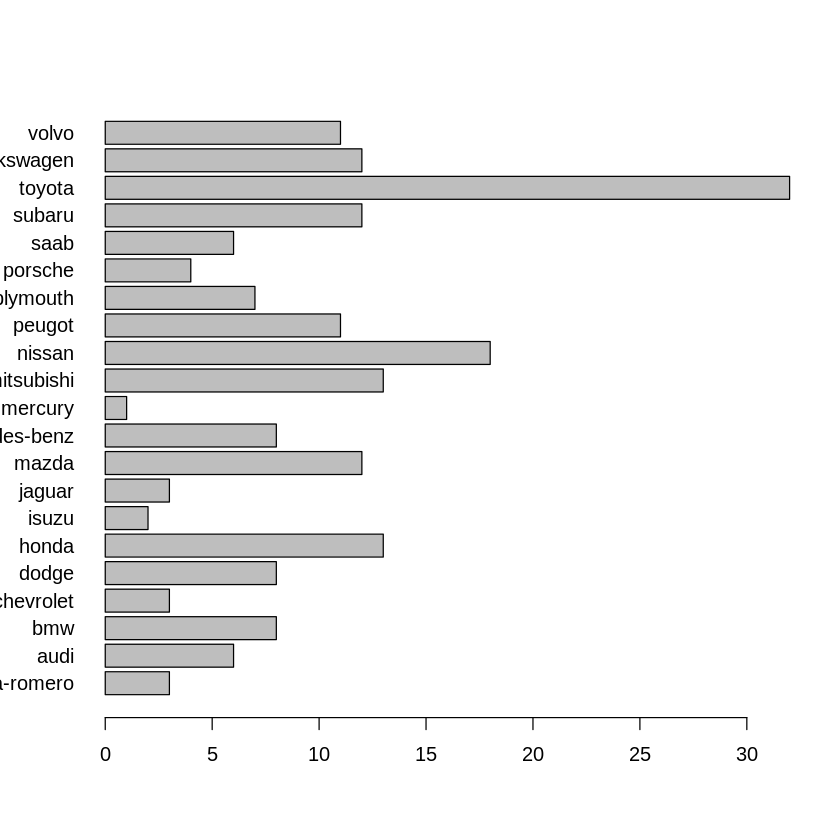

In [306]:
barplot(Tab3,horiz = TRUE, las = 1)

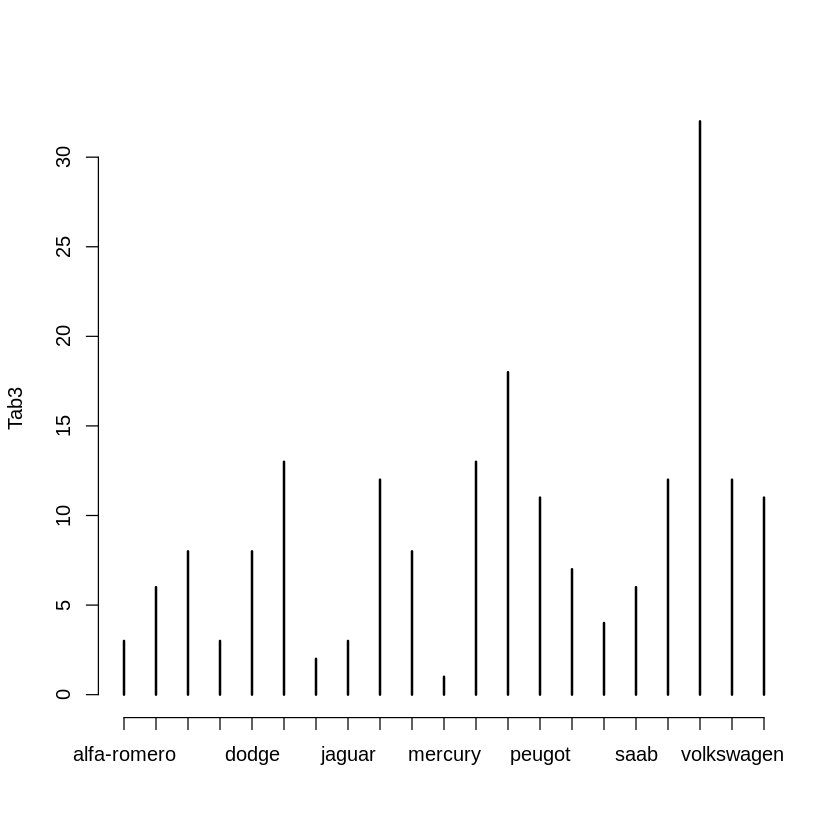

In [307]:
par(mfrow=c(1,1))
plot(Tab3)

In [308]:
summary(Tab3)

Number of cases in table: 193 
Number of factors: 1 

In [309]:
summary(autos$make)

   Length     Class      Mode 
      193 character character 

f)     Interprete os resultados do ajuste:
* i)        Em que posição a reta corta o eixo Y? Isso faz sentido?
* ii)        Como corrigir um modelo que apresenta este comportamento?

In [310]:
print("Sumário")
print(summary(y_preco))#Quartis
print("Quantis")
print(quantile(y_preco))
print("Média:") 
mean (y_preco) #Média
print("Mediana:") 
median(y_preco) #Mediana
print("Desvio Padrão:") 
sd(y_preco) #Desvio Padrão
print("Variância") 
var(y_preco) #Variância

[1] "Sumário"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5118    7738   10245   13285   16515   45400 
[1] "Quantis"
   0%   25%   50%   75%  100% 
 5118  7738 10245 16515 45400 
[1] "Média:"


[1] 13285.03

[1] "Mediana:"


[1] 10245

[1] "Desvio Padrão:"


[1] 8089.083

[1] "Variância"


[1] 65433262

In [311]:

# Create the function.
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

# Create the vector with numbers.
v <- y_preco

# Calculate the mode using the user function.
result <- getmode(v)
print("Moda")
print(result)

[1] "Moda"
[1] 16500


g)    Analise: Será que apenas a potência de um carro é suficiente para termos uma boa previsão do preço deste carro?
* i)        O que indica isso no seu ajuste?

`geom_smooth()` using formula 'y ~ x'



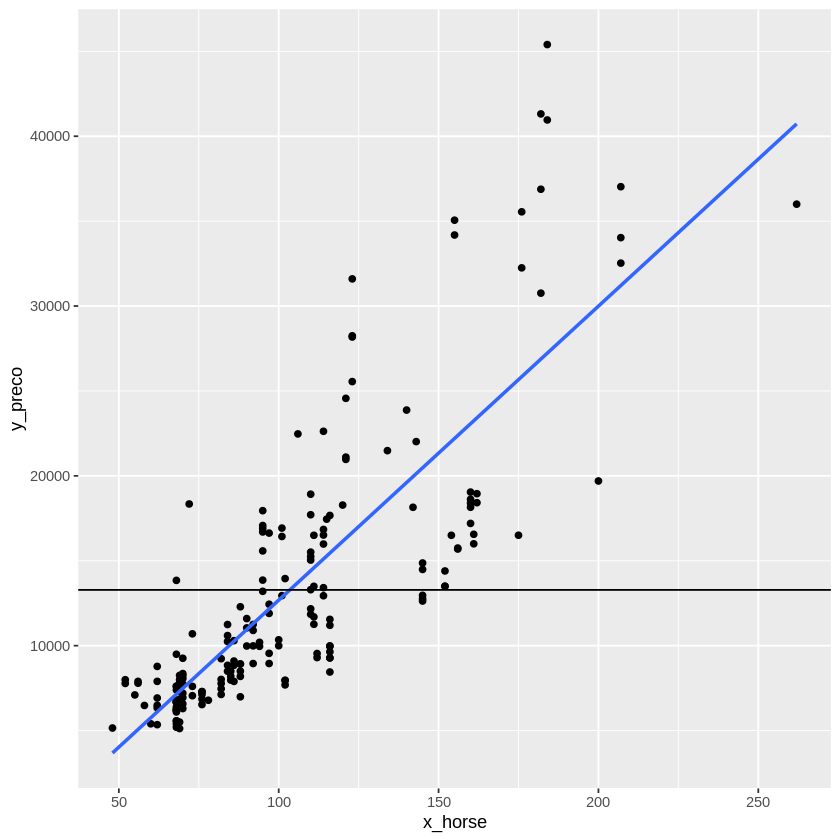

In [312]:
#Criando o gráfico com a regressão linear
retas3 <- ggplot(mapping = aes(x_horse, y_preco)) +
     geom_point() +
     geom_smooth(se = FALSE, method = "lm") + 
     geom_hline(yintercept = mean(y_preco))
retas3